# 🧹 Limpieza y Análisis de Datos con Pandas
Este notebook trabaja con el archivo `order_details.csv`.

---

## Índice

### **1. Carga de datos y exploración inicial**

### **2. Limpieza y preparación de datos**
- **2.1** Unión de DataFrames (`merge`)
- **2.2** Manejo de valores nulos (NaN)
- **2.3** Eliminación de duplicados
- **2.4** Conversión de tipos (`astype`)
- **2.5** Eliminación de columnas vacías

### **3. Análisis exploratorio**

#### 3.1 Estadísticas globales
- **3.1.1** Número de registros de detalle  
- **3.1.2** Cantidad total de pizzas (`sum(quantity)`)  
- **3.1.3** Cantidad promedio por pedido  

#### 3.2 Distribución por pizza
- **3.2.1** Agrupar por `pizza_id` para calcular:  
  - Total vendido  
  - Número de pedidos en los que aparece  
- **3.2.3** Pizzas más y menos populares  

#### 3.3 Análisis por pedido
- **3.3.1** Agrupar por `order_id` para calcular:  
  - Total de pizzas por pedido  
  - Número de líneas de detalle  
- **3.3.2** Distribución del tamaño de los pedidos  

### **4. Uso de NumPy**
- **4.1** Percentiles de cantidad total (`np.percentile`)  
- **4.2** Histogramas o distribuciones  

### **5. Preguntas clave**
- **5.1** Pizza más y menos vendida  
- **5.2** Promedio y mediana por pedido  
- **5.3** Porcentaje de pedidos por tamaño  
- **5.4** Pedidos anómalos (percentiles)  
- **5.5** Cómo calcular el valor estimado del pedido  

### **6. Guardar el dataset limpio**

### **7. Mini análisis final**


# 1. Importación y exploración inicial

In [2]:
import pandas as pd

# Cargar el CSV (ajusta la ruta si lo tienes en otra carpeta)
df = pd.read_csv("order_details.csv")

# Vista rápida de las primeras filas
display(df.head(10))
print("--------------------------------------------------------------------------")
# Información general de columnas y tipos
df.info()
print("--------------------------------------------------------------------------")
# Estadísticas básicas (incluyendo texto)
display(df.describe(include='all'))


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
5,6,2,thai_ckn_l,1
6,7,3,ital_supr_m,1
7,8,3,prsc_argla_l,1
8,9,4,ital_supr_m,1
9,10,5,ital_supr_m,1


--------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
--------------------------------------------------------------------------


,order_details_id,order_id,pizza_id,quantity
count,48620.000000,48620.000000,48620,48620.000000
unique,NaN,NaN,91,NaN
top,NaN,NaN,big_meat_s,NaN
freq,NaN,NaN,1811,NaN
mean,24310.500000,10701.479761,NaN,1.019622
std,14035.529381,6180.119770,NaN,0.143077
min,1.000000,1.000000,NaN,1.000000
25%,12155.750000,5337.000000,NaN,1.000000
50%,24310.500000,10682.500000,NaN,1.000000
75%,36465.250000,16100.000000,NaN,1.000000


# 2. Limpieza y preparación de datos

## 2.1 Unión de dos dataframes con la funcion (`merge`)

In [3]:
# Importacion del segundo dataframe
df2 = pd.read_csv("pizzas.csv")

# Union de los 2 dataframes
df_merged = df.merge(df2, how="inner", on="pizza_id")

# Vista rápida de las primeras filas
display(df_merged.head(10))
print("--------------------------------------------------------------------------")

print(df_merged.max())
print("--------------------------------------------------------------------------")
# Información general de columnas y tipos
df_merged.info()
print("--------------------------------------------------------------------------")
# Estadísticas básicas (incluyendo texto)
display(df_merged.describe(include='all'))

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
5,6,2,thai_ckn_l,1,thai_ckn,L,20.75
6,7,3,ital_supr_m,1,ital_supr,M,16.50
7,8,3,prsc_argla_l,1,prsc_argla,L,20.75
8,9,4,ital_supr_m,1,ital_supr,M,16.50
9,10,5,ital_supr_m,1,ital_supr,M,16.50


--------------------------------------------------------------------------
order_details_id           48620
order_id                   21350
pizza_id            veggie_veg_s
quantity                       4
pizza_type_id         veggie_veg
size                         XXL
price                      35.95
dtype: object
--------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.6+ MB
------------

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000
unique,NaN,NaN,91,NaN,32,5,NaN
top,NaN,NaN,big_meat_s,NaN,classic_dlx,L,NaN
freq,NaN,NaN,1811,NaN,2416,18526,NaN
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000


## 2.2 Detección y manejo de valores nulos (NaN)

In [4]:
# Conteo de valores nulos por columna
print("Valores nulos por columna:")
print(df_merged.isna().sum())
print("--------------------------------------------------------------------------")
# Eliminar filas que no tienen order_id, pizza_id y quantity (esenciales para análisis)
df_merged.dropna(subset=['order_id', 'pizza_id', 'quantity'], inplace=True)

print('\nDespués de limpieza de NaN:')
print(df_merged.isna().sum())
print("--------------------------------------------------------------------------")

display(df_merged.head(10))


Valores nulos por columna:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
dtype: int64
--------------------------------------------------------------------------

Después de limpieza de NaN:
order_details_id    0
order_id            0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
dtype: int64
--------------------------------------------------------------------------


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
5,6,2,thai_ckn_l,1,thai_ckn,L,20.75
6,7,3,ital_supr_m,1,ital_supr,M,16.50
7,8,3,prsc_argla_l,1,prsc_argla,L,20.75
8,9,4,ital_supr_m,1,ital_supr,M,16.50
9,10,5,ital_supr_m,1,ital_supr,M,16.50


## 2.3 Eliminación de duplicados

In [5]:
# Detectar filas duplicadas completas
duplicados = df_merged[df_merged.duplicated()]
print("Filas duplicadas detectadas:")
display(duplicados)
print("--------------------------------------------------------------------------")

# Eliminar duplicados
df_merged.drop_duplicates(inplace=True)

print("Tamaño tras eliminar duplicados:", df_merged.shape)


Filas duplicadas detectadas:


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price


--------------------------------------------------------------------------
Tamaño tras eliminar duplicados: (48620, 7)


## 2.4 Conversión de tipos de datos (`astype`)

In [6]:
print("Tipos ANTES:")
print(df_merged.dtypes)
print("--------------------------------------------------------------------------")

# Convertir columnas numéricas que puedan venir como texto
df_merged['quantity'] = df_merged['quantity'].astype(int)
df_merged['price'] = df_merged['price'].astype(float)

print("\nTipos DESPUÉS:")
print(df_merged.dtypes)
print("--------------------------------------------------------------------------")

display(df_merged.head(10))


Tipos ANTES:
order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
pizza_type_id        object
size                 object
price               float64
dtype: object
--------------------------------------------------------------------------

Tipos DESPUÉS:
order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
pizza_type_id        object
size                 object
price               float64
dtype: object
--------------------------------------------------------------------------


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00
2,3,2,five_cheese_l,1,five_cheese,L,18.50
3,4,2,ital_supr_l,1,ital_supr,L,20.75
4,5,2,mexicana_m,1,mexicana,M,16.00
5,6,2,thai_ckn_l,1,thai_ckn,L,20.75
6,7,3,ital_supr_m,1,ital_supr,M,16.50
7,8,3,prsc_argla_l,1,prsc_argla,L,20.75
8,9,4,ital_supr_m,1,ital_supr,M,16.50
9,10,5,ital_supr_m,1,ital_supr,M,16.50


## 2.5 Eliminación de columnas vacías

In [7]:
# Eliminamos columnas que estén completamente vacías
print("Columnas del DataFrame antes de la eliminacion de columnas vacias:")
print(df_merged.columns.tolist())
df_merged.dropna(axis=1, how='all', inplace=True)

print("\nColumnas del DataFrame despues de la eliminacion de columnas vacias:")
print(df_merged.columns.tolist())


Columnas del DataFrame antes de la eliminacion de columnas vacias:
['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price']

Columnas del DataFrame despues de la eliminacion de columnas vacias:
['order_details_id', 'order_id', 'pizza_id', 'quantity', 'pizza_type_id', 'size', 'price']


# 3. Análisis exploratorio 

## 3.1 Estadísticas globales

### 3.1.1 Calcular cuántos registros de detalle de pedido hay

In [8]:
# Contar la cantidad de filas de la columna order_details_id
print("Total de registros de detalle de pedido: ")
print(df_merged.order_details_id.count())

Total de registros de detalle de pedido: 
48620


### 3.1.2 Calcular la cantidad total de pizzas (sum(quantity))

In [9]:
df_total_pizzas = df_merged['quantity'].sum()
print(f"Cantidad total de pizzas vendidas: {df_total_pizzas}")

Cantidad total de pizzas vendidas: 49574


### 3.1.3 Calcular la cantidad promedio de pizzas por pedido

In [10]:
df_total_pedidos = df_merged['order_id'].nunique()
df_promedio_pizzas = df_total_pizzas / df_total_pedidos  

print(f"Número de pedidos únicos: {df_total_pedidos}")
print(f"Promedio de pizzas por pedido: {df_promedio_pizzas:.2f}")

Número de pedidos únicos: 21350
Promedio de pizzas por pedido: 2.32


## 3.2 Distribución por pizza

### 3.2.1 Agrupar por pizza_id para calcular:

#### · la cantidad total vendida (sum(quantity))

In [11]:
# Cantidad total vendida por tipo de pizza
pd.set_option("display.max_rows", None)
df_cantidad = df_merged.groupby("pizza_id", as_index=False)["quantity"].sum()
print("Cantidad total vendida por pizza")
df_cantidad.sort_values(["quantity"], ascending=True)


Cantidad total vendida por pizza


,pizza_id,quantity
87,the_greek_xxl,28
23,green_garden_l,95
13,ckn_alfredo_s,96
7,calabrese_s,99
43,mexicana_s,162
11,ckn_alfredo_l,188
35,ital_veggie_l,190
34,ital_supr_s,196
83,the_greek_l,255
78,spinach_supr_m,267


#### · la cantidad de pedidos en los que aparece (count(order_id) o nunique(order_id))

In [12]:
# Cantidad de pedidos en los que aparece una pizza
pd.set_option("display.max_rows", None)
df_pedidos = df_merged.groupby("pizza_id", as_index=False).agg(num_pedidos=("order_id", "count"))
print("Cantidad de pedidos en los que aparece una pizza:")
df_pedidos.sort_values(["num_pedidos"], ascending=True)

Cantidad de pedidos en los que aparece una pizza:


,pizza_id,num_pedidos
87,the_greek_xxl,28
23,green_garden_l,94
13,ckn_alfredo_s,96
7,calabrese_s,99
43,mexicana_s,160
11,ckn_alfredo_l,187
35,ital_veggie_l,190
34,ital_supr_s,194
83,the_greek_l,255
78,spinach_supr_m,266


### 3.2.2 Identificar las pizzas más populares (más cantidad vendida) y menos populares.

In [13]:
# Pizzas mas populares y menos populares
pd.reset_option("display.max_rows", None)
df_popularidad = df_merged.groupby("pizza_id", as_index=False)["quantity"].sum()
print("Top 10 de las pizzas mas populares y otro de las menos populares:")
df_popularidad.sort_values(["quantity"], ascending=False)


Top 10 de las pizzas mas populares y otro de las menos populares:


,pizza_id,quantity
3,big_meat_s,1914
80,thai_ckn_l,1410
20,five_cheese_l,1409
21,four_cheese_l,1316
18,classic_dlx_m,1181
...,...,...
43,mexicana_s,162
7,calabrese_s,99
13,ckn_alfredo_s,96
23,green_garden_l,95


## 3.3 Análisis por pedido

### 3.3.1 Agrupar por order_id para calcular:

#### · cantidad total de pizzas en cada pedido (sum(quantity))

In [14]:
order_stats = df_merged.groupby('order_id').agg({
    'quantity': 'sum',
    'order_details_id': 'count'
})

order_stats.columns = ['total_pizzas', 'total_items']
display(order_stats.head())

,total_pizzas,total_items
order_id,,
1,1,1
2,5,5
3,2,2
4,1,1
5,1,1


#### · número de líneas de detalle en cada pedido (count(order_details_id))

In [15]:
lineas_por_pedido = df_merged.groupby('order_id')['order_details_id'].count()

print("Número de líneas de detalle por pedido (primeros 5):")
display(lineas_por_pedido.head())

Número de líneas de detalle por pedido (primeros 5):


order_id
1    1
2    5
3    2
4    1
5    1
Name: order_details_id, dtype: int64

### 3.3.2 Verificar distribución de tamaño de los pedidos (por ejemplo: ¿cuántos pedidos tienen 1 pizza, más de 2, más de 3?)

In [16]:
# Distribucion del tamaño de los pedidos
pd.reset_option("display.max_rows", None)
df_cantidad_pizzas = df_merged.groupby("order_id", as_index=False).agg(cantidad_pizzas=("quantity", "sum"))
df_distribucion = df_cantidad_pizzas["cantidad_pizzas"].value_counts().sort_index().reset_index()
df_distribucion.columns = ["cantidad_pizzas", "cantidad_pedidos"]
print("Verificar distribución de tamaño de los pedidos:")
df_distribucion.sort_values(["cantidad_pizzas"])

Verificar distribución de tamaño de los pedidos:


,cantidad_pizzas,cantidad_pedidos
0,1,8111
1,2,6152
2,3,3207
3,4,3122
4,5,145
5,6,80
6,7,61
7,8,67
8,9,64
9,10,56


# 4 Uso de NumPy para análisis auxiliar

## 4.1 Usar np.percentile para calcular percentiles de la cantidad total de pizzas por pedido

In [17]:
import numpy as np
df_cantidad_pizzas = df_merged.groupby("order_id", as_index=False).agg(cantidad_pizzas=("quantity", "sum"))
print("Percentiles de la cantidad de pizzas por pedido:")
print("- Percentil 1: ")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 1))
print("- Percentil 5: ")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 5))
print("- Percentil 25: ")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 25))
print("- Percentil 50: ")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 50))
print("- Percentil 75:")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 75))
print("- Percentil 95:")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 95))
print("- Percentil 99:")
print(np.percentile(df_cantidad_pizzas["cantidad_pizzas"], 99))

Percentiles de la cantidad de pizzas por pedido:
- Percentil 1: 
1.0
- Percentil 5: 
1.0
- Percentil 25: 
1.0
- Percentil 50: 
2.0
- Percentil 75:
3.0
- Percentil 95:
4.0
- Percentil 99:
12.0


## 4.2 Crear histogramas o distribuciones para ver qué tan frecuente son pedidos grandes vs. pequeños

<Axes: >

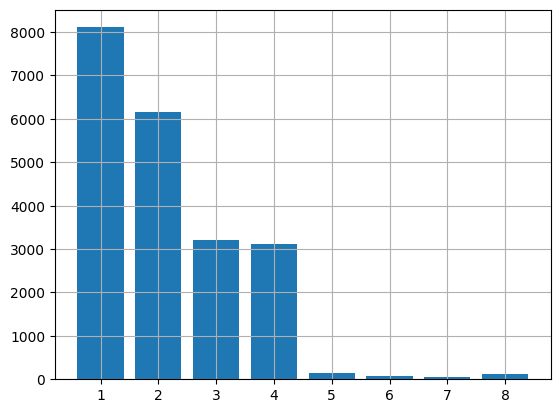

In [18]:
order_stats['total_pizzas'].hist(bins=range(1, 10), align='left', rwidth=0.8)

# 5. Preguntas

## 5.1 ¿Cuál es la pizza (pizza_id) más vendida en cuanto a cantidad y cuál la menos vendida?

In [19]:
# Pizzas mas vendidas y menos vendidas
df_popularidad = df_merged.groupby("pizza_id", as_index=False)["quantity"].sum()
print("Cantidad maxima de pizzas vendidas en un pedido:", df_popularidad["quantity"].max(), "pizzas")
print("Cantidad minima de pizzas vendidas en un pedido:", df_popularidad["quantity"].min(), "pizzas")


Cantidad maxima de pizzas vendidas en un pedido: 1914 pizzas
Cantidad minima de pizzas vendidas en un pedido: 28 pizzas


## 5.2 ¿Cuál es la cantidad promedio de pizzas por pedido? ¿Y la mediana?

In [20]:
df_popularidad = df_merged.groupby("order_id", as_index=False)["quantity"].sum()
print("Cantidad mediana de pizzas vendidas en un pedido:", df_popularidad["quantity"].median(), "pizzas")
print("Cantidad promedio de pizzas vendidas en un pedido:", df_popularidad["quantity"].mean(), "pizzas")


Cantidad mediana de pizzas vendidas en un pedido: 2.0 pizzas
Cantidad promedio de pizzas vendidas en un pedido: 2.321967213114754 pizzas


## 5.3 ¿Qué porcentaje de los pedidos tienen solo 1 pizza? ¿Y más de 2 pizzas?

In [21]:
total_orders = len(order_stats)
pedidos_1_pizza = order_stats[order_stats['total_pizzas'] == 1].shape[0]
pedidos_2_pizzas = order_stats[order_stats['total_pizzas'] == 2].shape[0]
pedidos_mas_2 = order_stats[order_stats['total_pizzas'] > 2].shape[0]

pct_1 = (pedidos_1_pizza / total_orders) * 100
pct_2 = (pedidos_2_pizzas / total_orders) * 100
pct_mas_2 = (pedidos_mas_2 / total_orders) * 100

print(f"Porcentaje de pedidos con 1 sola pizza: {pct_1:.2f}%")
print(f"Porcentaje de pedidos con 2 pizzas: {pct_2:.2f}%")
print(f"Porcentaje de pedidos con más de 2 pizzas: {pct_mas_2:.2f}%")
print("----------------------------------------------------------------")
print(f"Sumatoria de porcentajes: 1 pizza {pct_1:.2f}% + 2 pizzas {pct_2:.2f}% + más de 2 pizzas {pct_mas_2:.2f}% = {pct_1 + pct_2 + pct_mas_2:.2f}%")

Porcentaje de pedidos con 1 sola pizza: 37.99%
Porcentaje de pedidos con 2 pizzas: 28.81%
Porcentaje de pedidos con más de 2 pizzas: 33.19%
----------------------------------------------------------------
Sumatoria de porcentajes: 1 pizza 37.99% + 2 pizzas 28.81% + más de 2 pizzas 33.19% = 100.00%


## 5.4 ¿Existen pedidos que destaquen por tener una cantidad muy alta de pizzas? Identifícalos usando percentiles.

In [22]:
umbral_anomalo = np.percentile(order_stats['total_pizzas'], 99)
anomalos = order_stats[order_stats['total_pizzas'] > umbral_anomalo]
#test
print(f"Consideramos anómalos los pedidos con más de {umbral_anomalo} pizzas.")
print(f"Se encontraron {len(anomalos)} pedidos anómalos.")
display(anomalos.head())

Consideramos anómalos los pedidos con más de 12.0 pizzas.
Se encontraron 175 pedidos anómalos.


,total_pizzas,total_items
order_id,,
144,14,12
271,13,10
330,15,14
394,14,12
440,14,14


## 5.5 Si tuvieras los datos de precio de cada pizza, ¿cómo calcularías el valor estimado de cada pedido y cómo variarían los resultados anteriores?

In [23]:
df_merged['line_total'] = df_merged['price'] * df_merged['quantity']

revenue_per_order = df_merged.groupby('order_id')['line_total'].sum()

print(f"Valor promedio del pedido ($): {revenue_per_order.mean():.2f}")
print(f"Pedido más caro ($): {revenue_per_order.max():.2f}")

Valor promedio del pedido ($): 38.31
Pedido más caro ($): 444.20


## 6. Guardar el dataset limpio

In [24]:
df_merged.to_csv('order_details_clean.csv', index=False)
print('Archivo order_details_clean.csv guardado correctamente.')

Archivo order_details_clean.csv guardado correctamente.


# Graficos

## · Cantidad de pizzas por pedido

Total de pizzas vendidas: 49574
Cantidad de pedidos analizados para el histograma: 21350


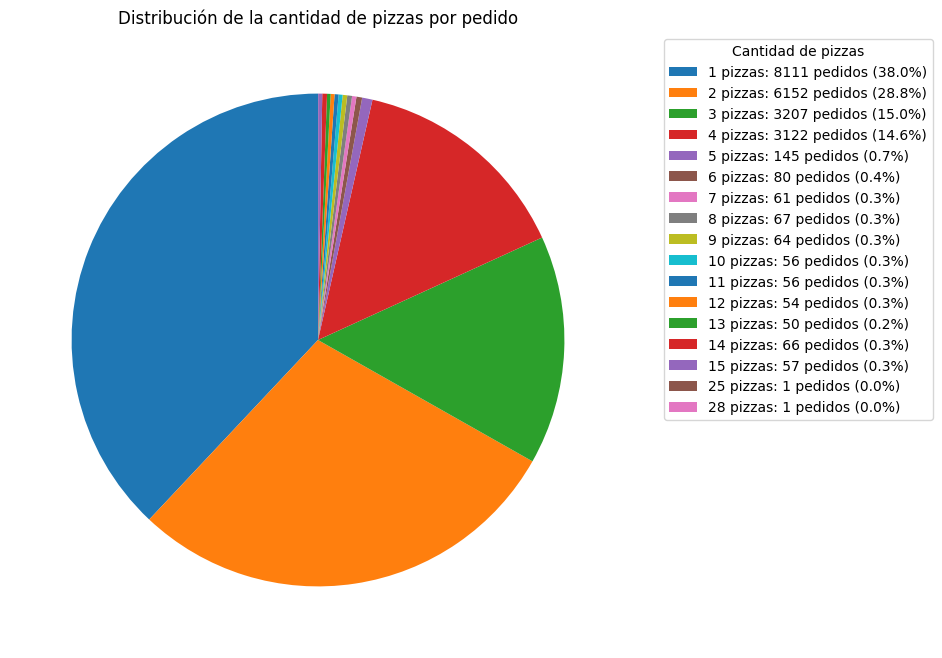

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por cantidad de pizzas y contar cuántos pedidos tienen esa cantidad
print("Total de pizzas vendidas:", df_merged["quantity"].sum())
df_cantidad_pizzas = df_merged.groupby("order_id", as_index=False).agg(cantidad_pizzas=("quantity", "sum"))
print("Cantidad de pedidos analizados para el histograma:", len(df_cantidad_pizzas))
df_pie = df_cantidad_pizzas['cantidad_pizzas'].value_counts().sort_index()  # contar por cantidad

# Datos para el pie chart
labels = df_pie.index.astype(str)  # cada cantidad de pizzas como etiqueta
sizes = df_pie.values               # cuántos pedidos tienen cada cantidad

# Crear gráfico circular
plt.figure(figsize=(8, 8))
wedges, texts = plt.pie(
    sizes,
    labels=None,     # no mostrar texto dentro de las porciones
    startangle=90
)

# Leyenda con cantidad de pizzas, número de pedidos y porcentaje
legend_labels = [f"{label} pizzas: {size} pedidos ({size/sizes.sum()*100:.1f}%)"
                 for label, size in zip(labels, sizes)]

plt.legend(wedges, legend_labels, title="Cantidad de pizzas", bbox_to_anchor=(1.05, 1))
plt.title("Distribución de la cantidad de pizzas por pedido")
plt.show()


## · Evolucion de las ingresos generados por la catergoria de pizzas

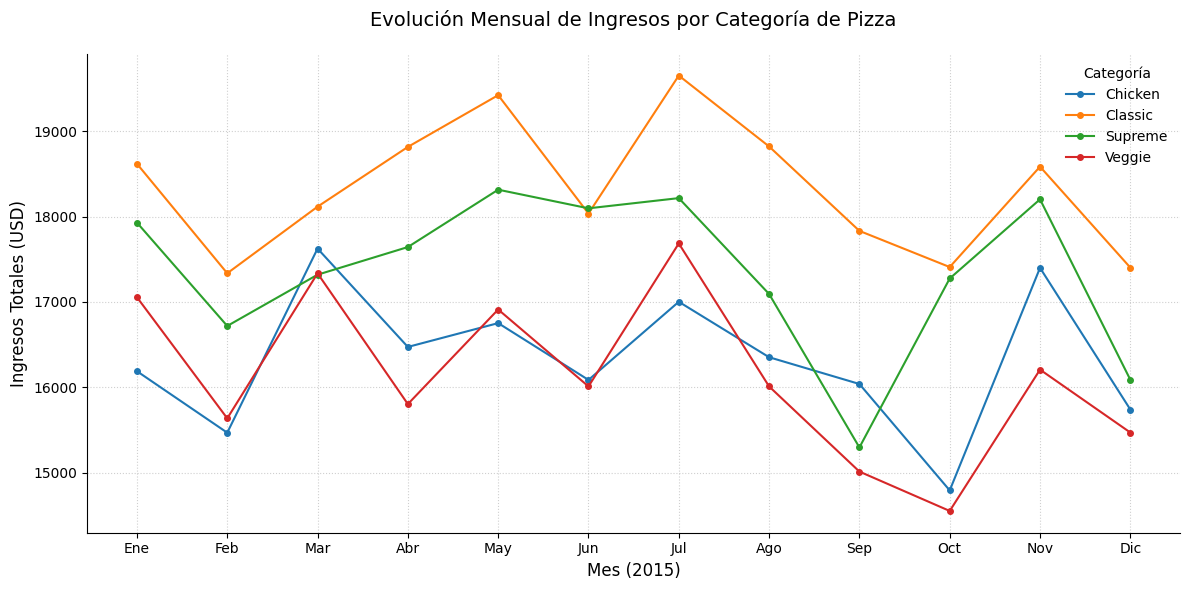

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datos con la codificación corregida
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')

# 2. Unir todas las tablas para tener Fechas, Precios y Categorías
df = order_details.merge(pizzas, on='pizza_id')
df = df.merge(pizza_types, on='pizza_type_id')
df = df.merge(orders, on='order_id')

# 3. Preparar los datos temporales
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month # Extraemos el número del mes
df['revenue'] = df['quantity'] * df['price']

# 4. Agrupar por mes y categoría
evolucion = df.groupby(['month', 'category'])['revenue'].sum().unstack()

# 5. Crear la gráfica de líneas finas
plt.figure(figsize=(12, 6))

# Dibujamos cada categoría con una línea fina
for categoria in evolucion.columns:
    plt.plot(evolucion.index, evolucion[categoria], marker='o', markersize=4, linewidth=1.5, label=categoria)

# Configuración estética
plt.title('Evolución Mensual de Ingresos por Categoría de Pizza', fontsize=14, pad=20)
plt.xlabel('Mes (2015)', fontsize=12)
plt.ylabel('Ingresos Totales (USD)', fontsize=12)
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Categoría', frameon=False)
plt.grid(True, linestyle=':', alpha=0.6)

# Eliminar bordes para un look más moderno
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

## · Pizza más y menos vendida

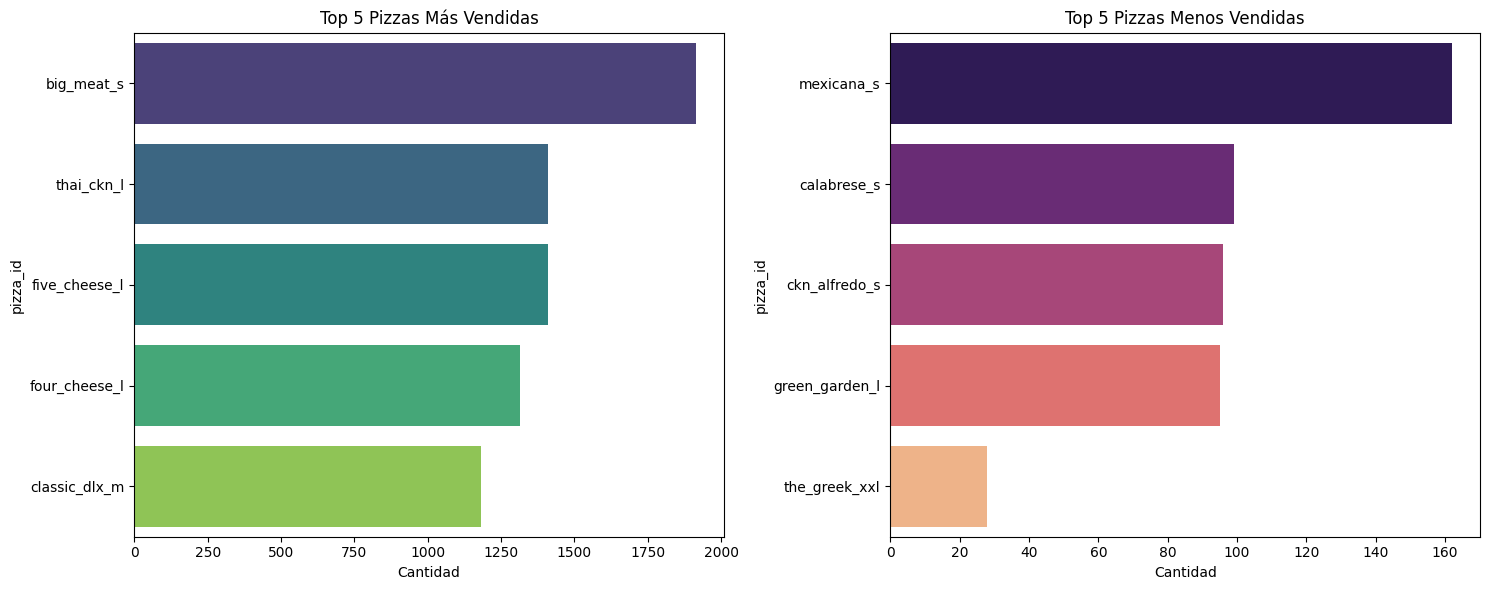

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Total de ventas por pizza
ventas_pizza = df_merged.groupby('pizza_id')['quantity'].sum().sort_values(ascending=False)
 
# Separacion las 5 más vendidas y las 5 menos vendidas
top_5 = ventas_pizza.head(5)
bottom_5 = ventas_pizza.tail(5)
 
# subgráficos (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
 
# Gráfico Top 5
sns.barplot(x=top_5.values, y=top_5.index, ax=axes[0], hue=top_5.index, palette='viridis', legend=False)
axes[0].set_title('Top 5 Pizzas Más Vendidas')
axes[0].set_xlabel('Cantidad')
 
# Gráfico Bottom 5
sns.barplot(x=bottom_5.values, y=bottom_5.index, ax=axes[1], hue=bottom_5.index, palette='magma', legend=False)
axes[1].set_title('Top 5 Pizzas Menos Vendidas')
axes[1].set_xlabel('Cantidad')
 
plt.tight_layout()
plt.show()

## · Cantidad promedio y mediana

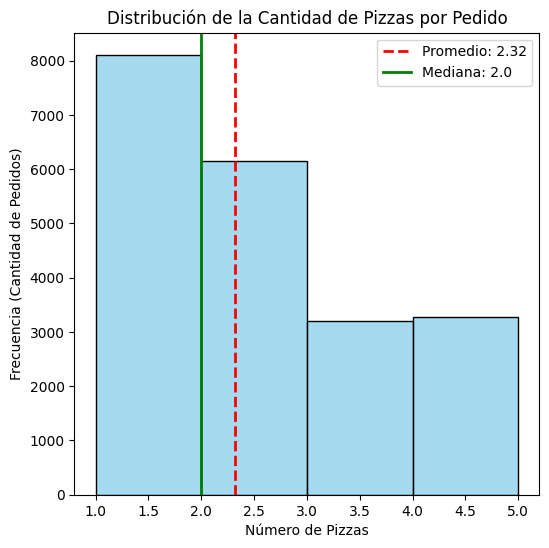

In [62]:
# Agrupacion por pedido para obtener el tamaño (cantidad de pizzas)
pizzas_por_pedido = df_merged.groupby('order_id')['quantity'].sum()
 
# media y mediana
media = pizzas_por_pedido.mean()
mediana = pizzas_por_pedido.median()
 
plt.figure(figsize=(6, 6))
 
# Histograma de frecuencia
sns.histplot(pizzas_por_pedido, bins=range(1, 6), kde=False, color='skyblue', edgecolor='black')
 
# Líneas para media y mediana
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Promedio: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana}')
 
plt.title('Distribución de la Cantidad de Pizzas por Pedido')
plt.xlabel('Número de Pizzas')
plt.ylabel('Frecuencia (Cantidad de Pedidos)')
plt.legend()
plt.show()

## · Pedidos anómalos / Outliers

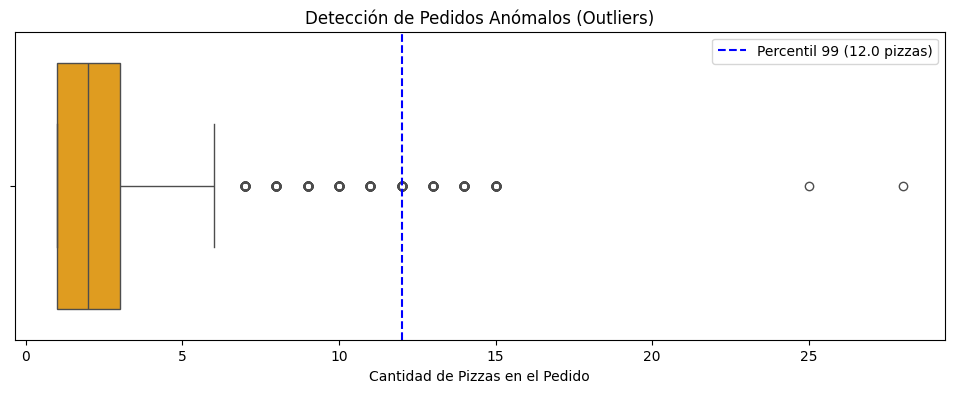

In [29]:
plt.figure(figsize=(12, 4))
 
# Boxplot horizontal
sns.boxplot(x=pizzas_por_pedido, color='orange')
 
# Marcar el percentil 99 visualmente
percentil_99 = pizzas_por_pedido.quantile(0.99)
plt.axvline(percentil_99, color='blue', linestyle='--', label=f'Percentil 99 ({percentil_99} pizzas)')
 
plt.title('Detección de Pedidos Anómalos (Outliers)')
plt.xlabel('Cantidad de Pizzas en el Pedido')
plt.legend()
plt.show()

## · Mapa de calor 

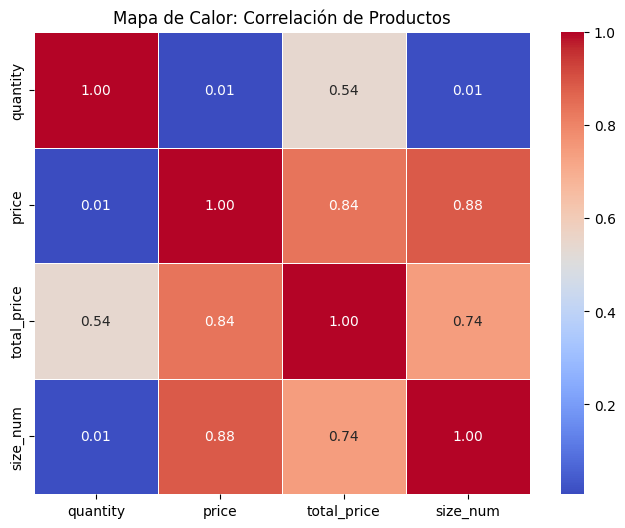

In [81]:
# 1. Cargar los datos
orders = pd.read_csv('orders.csv')
details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')

# 2. Unir las tablas
df = pd.merge(details, pizzas, on='pizza_id', how='left')
df = pd.merge(df, orders, on='order_id', how='left')

# 3. Preparar variables
df['total_price'] = df['quantity'] * df['price']
size_map = {'S': 1, 'M': 2, 'L': 3, 'XL': 4, 'XXL': 5}
df['size_num'] = df['size'].map(size_map)

# 4. Seleccionar columnas (SIN hora ni días)
# Solo nos quedan variables de producto y cantidad
cols_to_corr = ['quantity', 'price', 'total_price', 'size_num']
correlation_matrix = df[cols_to_corr].corr()

# 5. Generar el Mapa de Calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5)

plt.title('Mapa de Calor: Correlación de Productos')
plt.show()

## · Diagrama de caja

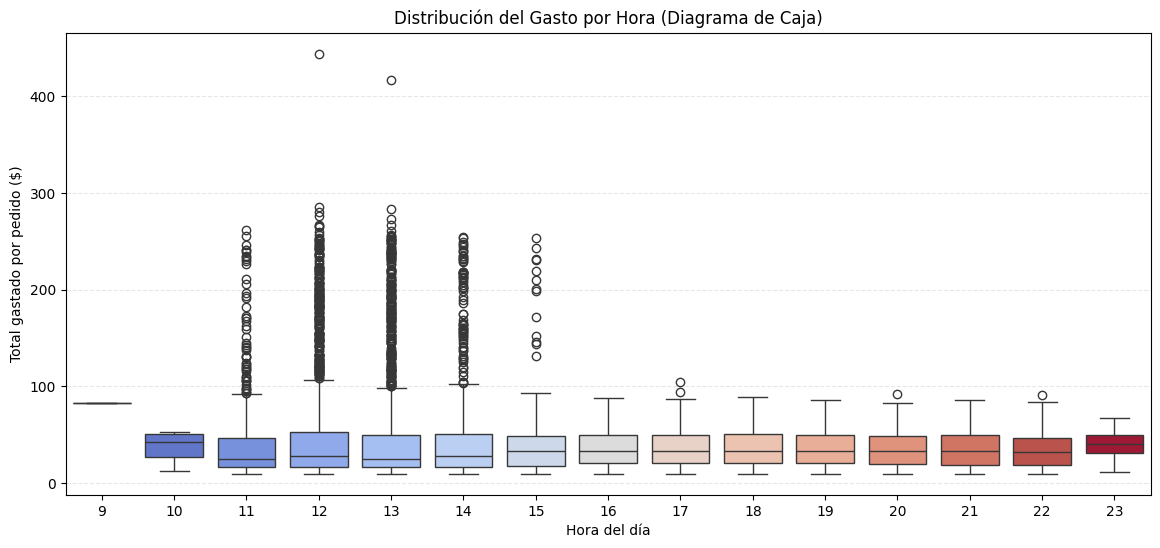

In [41]:
# 1. Aseguramos que tenemos los datos agrupados por pedido (si ya lo hiciste antes, salta este paso)
order_summary = df.groupby('order_id').agg({
    'total_price': 'sum',
    'hour': 'first'
}).reset_index()

# 2. Crear el Boxplot
plt.figure(figsize=(14, 6))

sns.boxplot(
    data=order_summary,
    x='hour',
    y='total_price',
    hue='hour',
    palette='coolwarm', # Colores de frío a caliente
    legend=False
)

plt.title('Distribución del Gasto por Hora (Diagrama de Caja)')
plt.xlabel('Hora del día')
plt.ylabel('Total gastado por pedido ($)')
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Limitamos el eje Y para ver mejor la "caja" (a veces los outliers muy altos aplastan el gráfico)
# Si quieres ver TODOS los outliers, borra esta línea:
# plt.ylim(0, 100) 

plt.show()